In [1]:
from histocartography.io.wsi import WSI
import matplotlib.pyplot as plt

import numpy as np

import cv2

import seaborn as sns

In [2]:
img = WSI('/Users/fra/Downloads/tumor_105.tif', minimum_tissue_content=.05)

2019-10-31 15:54:56,441 - Histocartography::IO::WSI - DEBUG - wsi_file : /Users/fra/Downloads/tumor_105.tif
2019-10-31 15:54:56,448 - Histocartography::IO::WSI - WARNING - Phillips WSI. Magnification might be incorrect
2019-10-31 15:54:56,450 - Histocartography::IO::WSI - DEBUG - Original mag: 36.21096
2019-10-31 15:54:56,451 - Histocartography::IO::WSI - DEBUG - Levels: 9
2019-10-31 15:54:56,452 - Histocartography::IO::WSI - DEBUG - Level dimensions ((106496, 93184), (53248, 46592), (26624, 23296), (13312, 11648), (6656, 5824), (3328, 2912), (1664, 1456), (832, 728), (416, 364))


2019-10-31 15:54:56,467 - Histocartography::IO::WSI - DEBUG - Level for desired resolution : 6
2019-10-31 15:54:56,612 - Histocartography::IO::WSI - DEBUG - Image shape after loading (1456, 1664, 3)
2019-10-31 15:54:56,794 - Histocartography::IO::WSI - DEBUG - tissue mask generated
2019-10-31 15:54:56,836 - Histocartography::IO::WSI - DEBUG - Level for desired resolution : 6
2019-10-31 15:54:56,927 - Histocartography::IO::WSI - DEBUG - Image shape after loading (1456, 1664, 3)


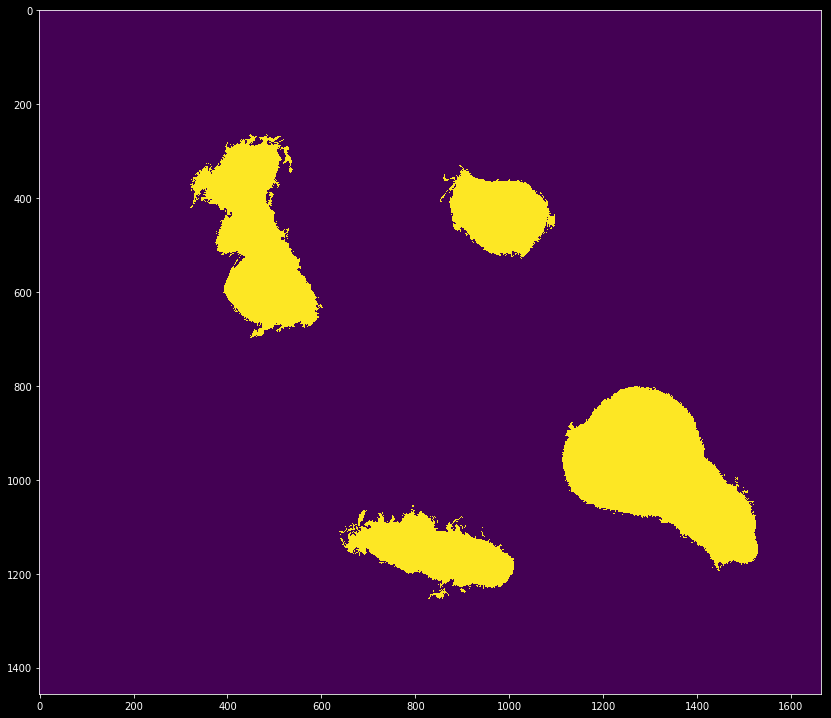

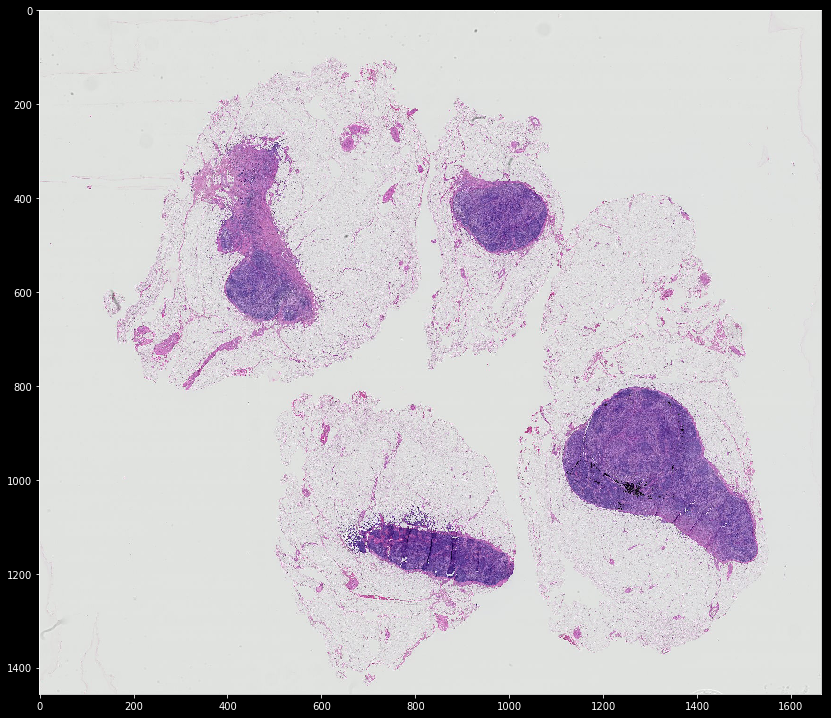

In [3]:
tissue_mask = img.tissue_mask_at(mag=0.5)
plt.figure(figsize=(14, 14))
plt.imshow(tissue_mask)

full_image = img.image_at(mag=0.5)
plt.figure(figsize=(14, 14))
plt.imshow(full_image)

In [4]:
size = 512
patches = img.patches(mag=0.5,
                      size=(size, size),
                      stride=(size, size))

2019-10-31 15:54:59,391 - Histocartography::IO::WSI - DEBUG - Level for desired resolution : 6
2019-10-31 15:54:59,392 - Histocartography::IO::WSI - DEBUG - Step size : 37080 37080
2019-10-31 15:54:59,393 - Histocartography::IO::WSI - DEBUG - Num Patches : 3 3
2019-10-31 15:54:59,393 - Histocartography::IO::WSI - DEBUG - Level for desired resolution : 5
2019-10-31 15:54:59,998 - Histocartography::IO::WSI - DEBUG - Image shape after loading (2912, 3328, 3)
2019-10-31 15:55:00,037 - Histocartography::IO::WSI - DEBUG - THRESHOLD: 83.0  -- Darkest: 19, Brightest: 254, Average: 213.6604881286621
2019-10-31 15:55:00,038 - Histocartography::IO::WSI - DEBUG - Region 0,0 has 0.001743316650390625 pixels ratio
2019-10-31 15:55:00,076 - Histocartography::IO::WSI - DEBUG - THRESHOLD: 83.0  -- Darkest: 0, Brightest: 238, Average: 3.2914276123046875
2019-10-31 15:55:00,077 - Histocartography::IO::WSI - DEBUG - Region 0,37080 has 0.9939155578613281 pixels ratio
x: 0, y: 37080
patch shape: (512, 512, 3

<Figure size 1008x1008 with 0 Axes>

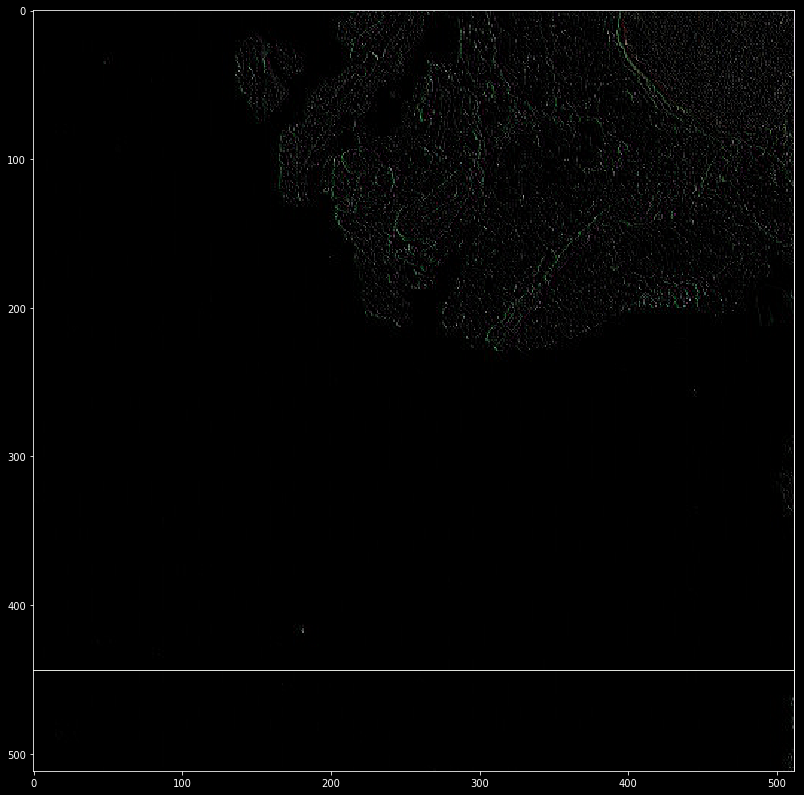

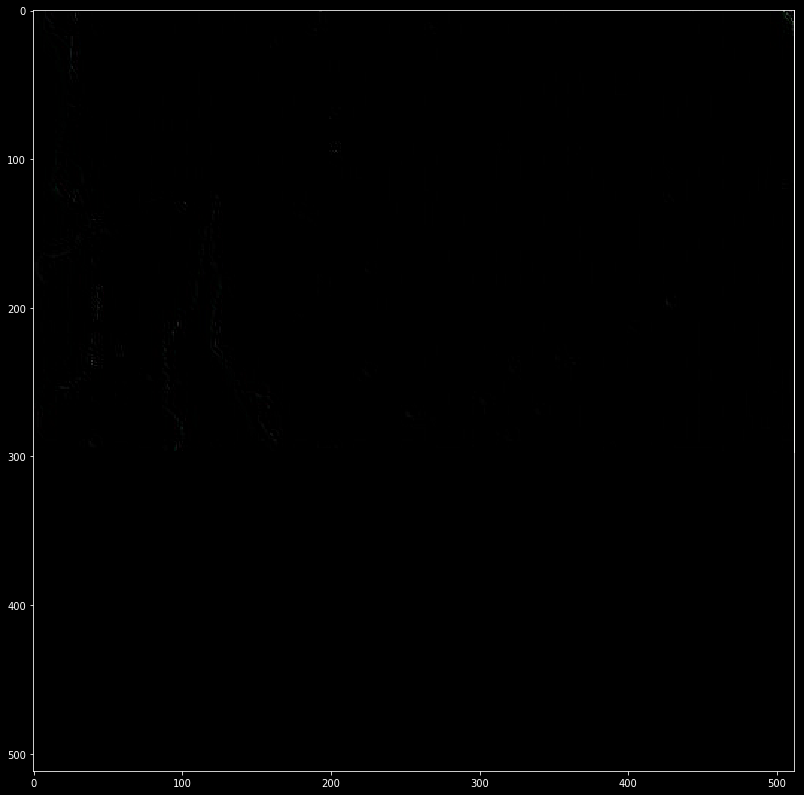

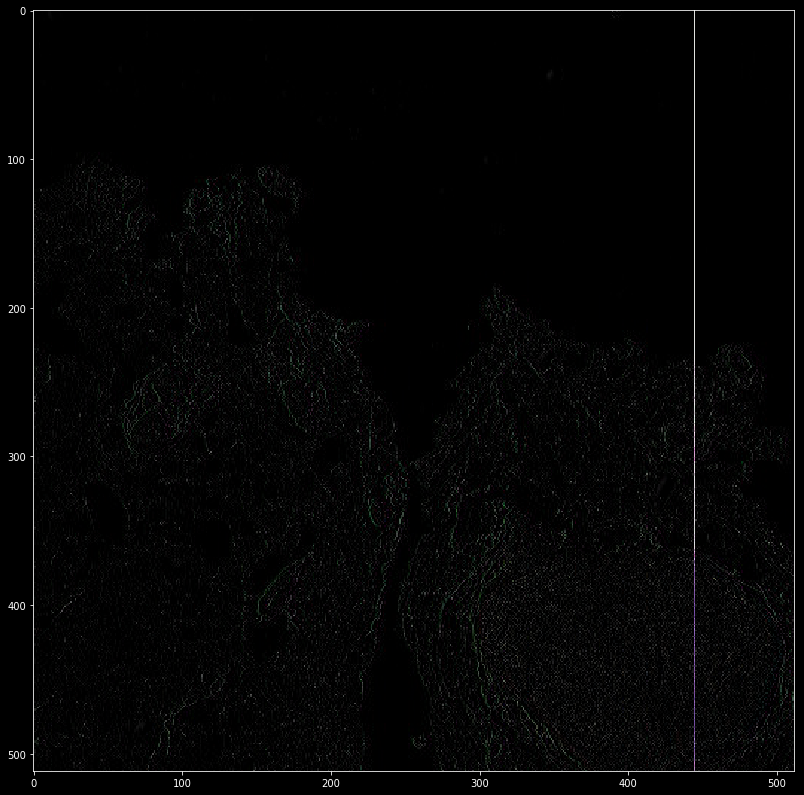

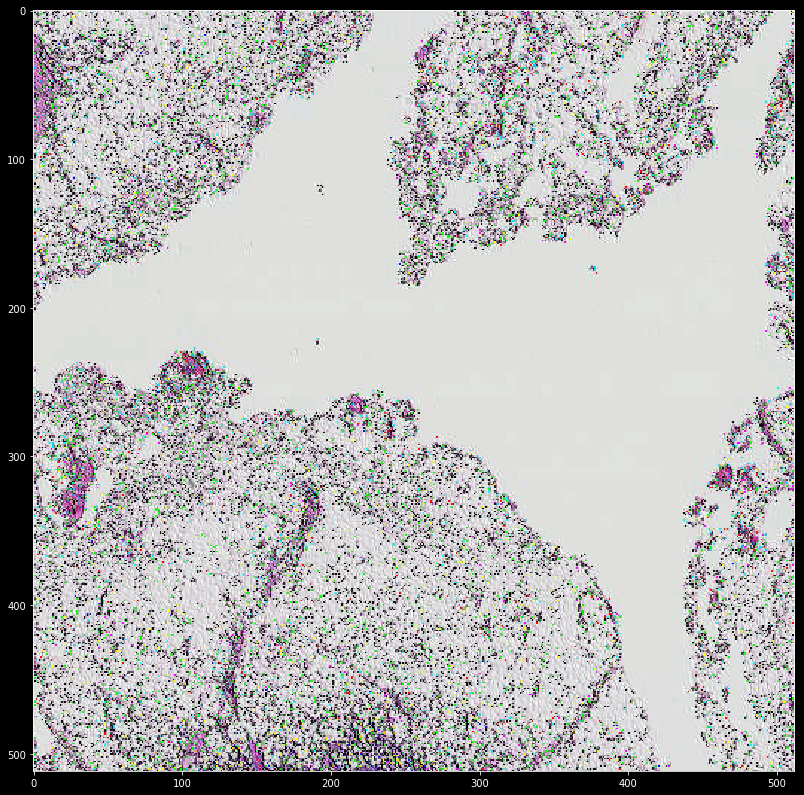

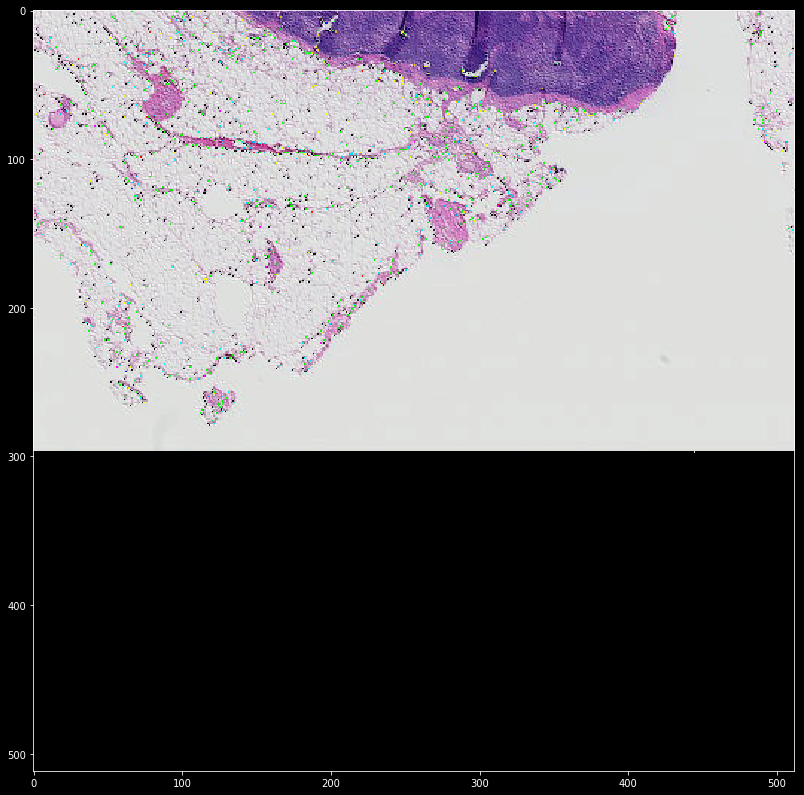

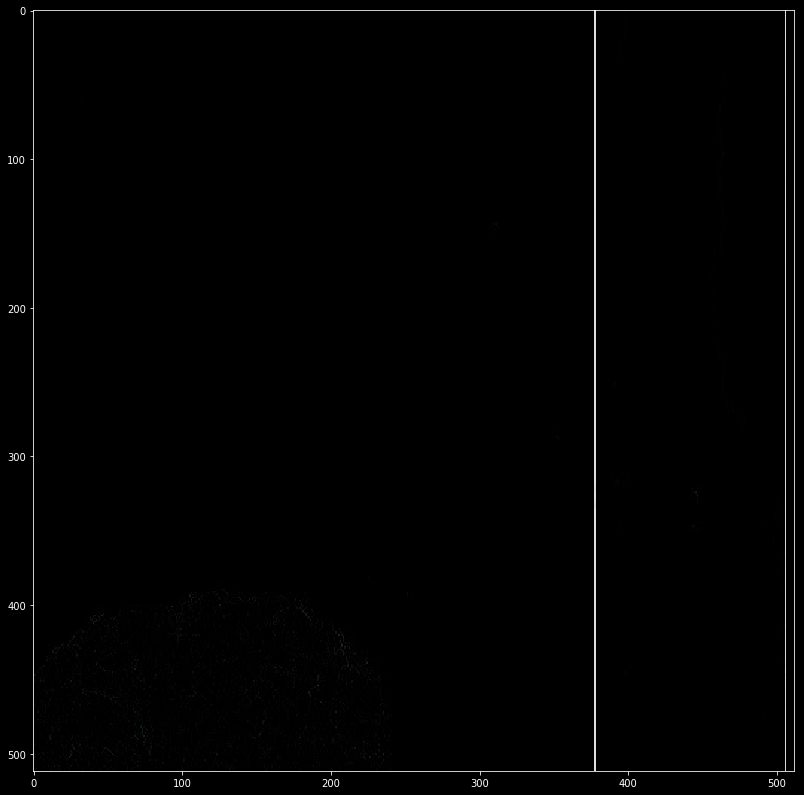

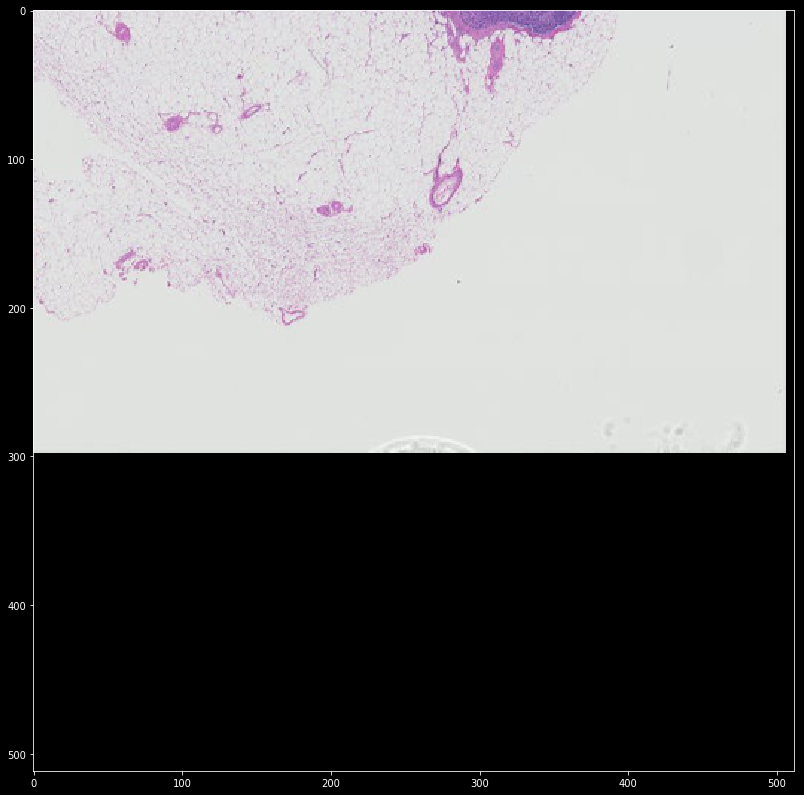

In [5]:
plt.figure(figsize=(14, 14))
for patch in patches:
    #patch = next(patches)
    #plt.subplot(1, 8, i+1)
    plt.figure(figsize=(14, 14))
    plt.imshow(patch[6],vmin=0, vmax=255)
    print("x: {}, y: {}".format(patch[0], patch[1]))
    print(f'patch shape: {patch[6].shape}')

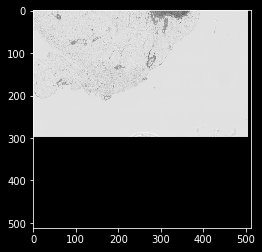

In [6]:
gray = cv2.cvtColor(patch[6], cv2.COLOR_RGB2GRAY)
plt.imshow(gray, vmin=0, vmax=255, cmap='gray')

In [7]:
gray

array([[193, 211, 214, ...,   0,   0,   0],
       [192, 213, 221, ...,   0,   0,   0],
       [203, 211, 219, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [8]:
def test_region(region, threshold):
    gray = cv2.cvtColor(region, cv2.COLOR_RGB2GRAY)
    num_pixs = np.sum(gray < threshold)
    print(num_pixs)
    print(num_pixs/(512**2))

In [9]:
patch1, labels = img.get_patch_with_labels(1, 5, (int(0+512*img.mag), int(512*img.mag)), (512, 512))
patch2, lables = img.get_patch_with_labels(1, 5, (int(0+2*512*img.mag), int(0+2*512*img.mag)), (512, 512))

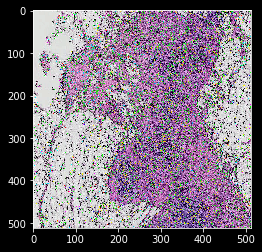

In [10]:
#plt.subplot(121)
plt.imshow(patch1, vmin=0, vmax=255)
#plt.subplot(122)
#plt.imshow(patch2, vmin=0, vmax=255)

In [11]:
test_region(patch1, 83)
test_region(patch2, 83)

45307
0.17283248901367188
17
6.4849853515625e-05


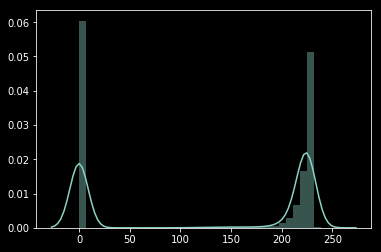

In [12]:
sns.distplot(gray.reshape(-1))

In [13]:
for key, value in img.stack.properties.items():
    print(f'{key}: {value}')

openslide.level-count: 9
openslide.level[0].downsample: 1
openslide.level[0].height: 93184
openslide.level[0].tile-height: 512
openslide.level[0].tile-width: 512
openslide.level[0].width: 106496
openslide.level[1].downsample: 2
openslide.level[1].height: 46592
openslide.level[1].tile-height: 512
openslide.level[1].tile-width: 512
openslide.level[1].width: 53248
openslide.level[2].downsample: 4
openslide.level[2].height: 23296
openslide.level[2].tile-height: 512
openslide.level[2].tile-width: 512
openslide.level[2].width: 26624
openslide.level[3].downsample: 8
openslide.level[3].height: 11648
openslide.level[3].tile-height: 512
openslide.level[3].tile-width: 512
openslide.level[3].width: 13312
openslide.level[4].downsample: 16
openslide.level[4].height: 5824
openslide.level[4].tile-height: 512
openslide.level[4].tile-width: 512
openslide.level[4].width: 6656
openslide.level[5].downsample: 32
openslide.level[5].height: 2912
openslide.level[5].tile-height: 512
openslide.level[5].tile-widt